# 🌳 Modelo 3: Regresión con Árbol de Decisión

Este notebook implementa un modelo de regresión usando **Decision Tree Regressor** para predecir el `impact_score` de los jugadores en Rainbow Six Siege.

## Características del modelo:
- **Algoritmo**: Decision Tree Regressor
- **Variable objetivo**: impact_score
- **Ventajas**: Fácil interpretación, maneja datos categóricos y numéricos
- **Desventajas**: Propenso al overfitting

In [12]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo de gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [13]:
# Cargar extensión de Kedro
%load_ext kedro.ipython

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


In [14]:
# Cargar los datos
data = catalog.load("data_final")

print("📊 Información del dataset:")
print(f"Shape: {data.shape}")
print(f"Columnas disponibles: {len(data.columns)}")
print("\n🎯 Variable objetivo: impact_score")
print(f"Estadísticas del target:")
print(data['impact_score'].describe())

[10/14/25 20:12:38] INFO     Loading data from data_final (CSVDataset)...                      ]8;id=319044;file://c:\Users\droid\Desktop\Rainbow_six_kedro\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=51986;file://c:\Users\droid\Desktop\Rainbow_six_kedro\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

📊 Información del dataset:
Shape: (200873, 33)
Columnas disponibles: 33

🎯 Variable objetivo: impact_score
Estadísticas del target:
count    200873.000000
mean          0.371553
std           0.787608
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           6.000000
Name: impact_score, dtype: float64


## 🔧 Preparación de los datos

Para el árbol de decisión, seleccionaremos características que sean relevantes para predecir el impact_score. Los árboles de decisión pueden manejar tanto variables categóricas como numéricas.

In [15]:
# Preparar X e y
X = data[[ 
     'gamemode',        # tipo de partida
    'winrole',         # atacante o defensor
    'endroundreason',  # cómo terminó la ronda
    'roundduration',   # cuánto duró
    'isdead',          # si el jugador murió
    'nbkills',]]

y = data['impact_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(
    ccp_alpha=0.0, 
    criterion='squared_error', 
    max_depth=10, 
    max_features=None, 
    max_leaf_nodes=None, 
    min_impurity_decrease=0.0, 
    min_samples_leaf=10, 
    min_samples_split=20, 
    min_weight_fraction_leaf=0.0, 
    monotonic_cst=None, 
    random_state=42, 
    splitter='best'
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f"📊 Árbol de Decisión - Resultados:")
print(f"=" * 40)
print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"=" * 40)

# Interpretación del rendimiento
if r2 > 0.7:
    print(" Buen ajuste (R² > 0.7)")
elif r2 > 0.5:
    print(" Ajuste moderado (R² > 0.5)")
else:
    print("Ajuste pobre (R² < 0.5)")

📊 Árbol de Decisión - Resultados:
R²: 0.7925
MAE: 0.1559
RMSE: 0.3560
 Buen ajuste (R² > 0.7)


In [16]:
# Mostrar resultados en formato simple
print("MSE: ", mse)
print("MAE: ", mae)
print("RMSE: ", rmse)
print("R^2: ", r2)

MSE:  0.12670598162257088
MAE:  0.15593591157023023
RMSE:  0.3559578368607311
R^2:  0.792485764511923


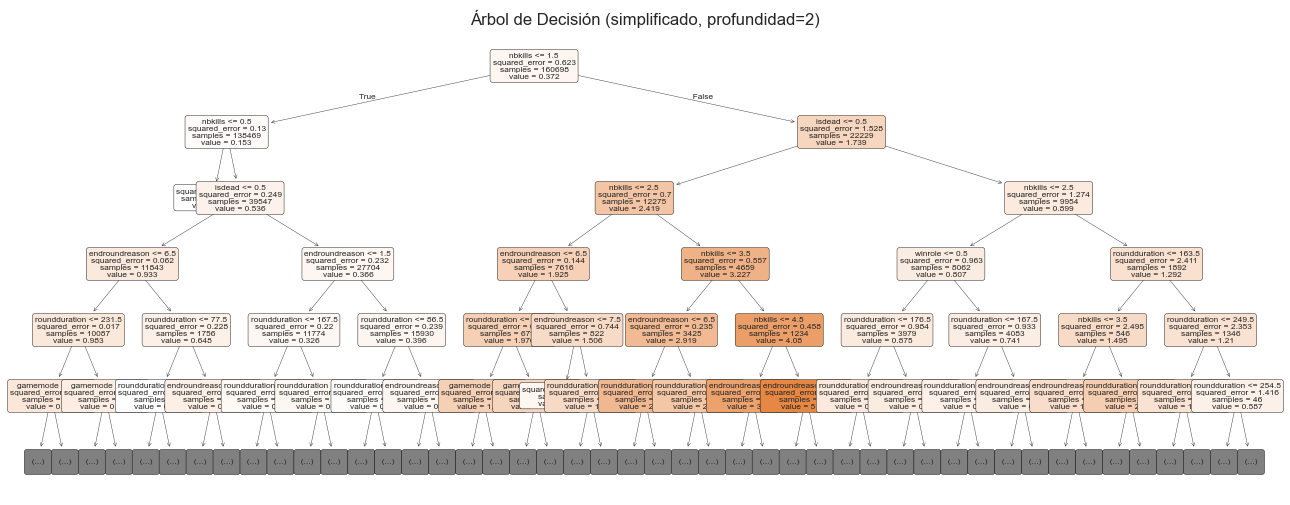

In [17]:
plt.figure(figsize=(16, 6))
plot_tree(
    model,
    feature_names=X.columns,
    filled=True,
    max_depth=5,  # Limita la profundidad para simplificar el gráfico
    fontsize=6,
    rounded=True
)
plt.title("Árbol de Decisión (simplificado, profundidad=2)")
plt.show()

In [18]:
from sklearn.model_selection import GridSearchCV

# Definir el espacio de hiperparámetros
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 10, 20, 50],
    'min_samples_leaf': [1, 5, 10, 20],
    'ccp_alpha': [0.0, 0.01, 0.05]
}

# Instanciar el modelo base
dt = DecisionTreeRegressor(random_state=42)

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

# Ajustar el grid search
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo y hacer predicciones
best_model = grid_search.best_estimator_
y_pred_gs = best_model.predict(X_test)

# Calcular métricas con las predicciones del mejor modelo
mse_gs = mean_squared_error(y_test, y_pred_gs)
mae_gs = mean_absolute_error(y_test, y_pred_gs)
rmse_gs = mse_gs ** 0.5
r2_gs = r2_score(y_test, y_pred_gs)

# mostrar que termino de forma exitosa
print("Grid Search completado exitosamente.")

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Grid Search completado exitosamente.
Grid Search completado exitosamente.


In [19]:
# Mostrar los resultados del grid search
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print("\nResultados del mejor modelo tras GridSearchCV:")
print("MSE (test): ", mse_gs)
print("MAE (test): ", mae_gs)
print("RMSE (test): ", rmse_gs)
print("R^2 (test): ", r2_gs)

Mejores hiperparámetros encontrados:
{'ccp_alpha': 0.0, 'max_depth': 7, 'min_samples_leaf': 10, 'min_samples_split': 50}

Resultados del mejor modelo tras GridSearchCV:
MSE (test):  0.12552989395355368
MAE (test):  0.1580717799358849
RMSE (test):  0.3543019813006324
R^2 (test):  0.7944119161456323


##  Conclusión del Modelo de Árbol de Decisión

### **Resultados Obtenidos:**

**Modelo Base:**
- MSE: 0.1267, MAE: 0.1559, RMSE: 0.3560, R²: 0.7925

**Modelo Optimizado (GridSearch):**
- MSE: 0.1255, MAE: 0.1581, RMSE: 0.3543, R²: 0.7944

### **Análisis de Rendimiento:**

 **Buen rendimiento general**: Con un R² de ~0.79, el modelo explica aproximadamente el **79% de la variabilidad** en el impact_score, lo cual es un resultado sólido.

 **Optimización efectiva**: El GridSearch logró mejorar ligeramente el modelo, especialmente en las métricas de error cuadrático (MSE y RMSE).

 **Hiperparámetros óptimos**: 
- `max_depth=7`: Controla el overfitting manteniendo buena capacidad predictiva
- `min_samples_split=50`: Evita divisiones en muestras muy pequeñas
- `min_samples_leaf=10`: Asegura hojas con suficientes observaciones